# Nuclei Segmentation using Voronoi-Otsu-Labeling

In this notebook, we will perform nuclei segmentation on an image using the Voronoi-Otsu-Labeling method from the `napari-segment-blobs-and-things-with-membranes` library.

## Import Libraries

We will start by importing the necessary libraries for image analysis.

In [1]:
import numpy as np
import stackview
import napari_segment_blobs_and_things_with_membranes as nsbatwm
from skimage.io import imread, imsave

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:10: UserWarning: Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.
  warnings.warn("Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.")


## Load Image

We will load the image from the file `human_mitosis_small.png`.

In [2]:
image = imread('human_mitosis_small.png')

## Display Original Image

Let's take a look at the original image using `stackview`.

StackViewNDArray([[[  8,   8,   8, 255],
                   [  8,   8,   8, 255],
                   [  8,   8,   8, 255],
                   ...,
                   [  9,   9,   9, 255],
                   [  9,   9,   9, 255],
                   [  9,   9,   9, 255]],

                  [[  8,   8,   8, 255],
                   [  8,   8,   8, 255],
                   [  7,   7,   7, 255],
                   ...,
                   [  9,   9,   9, 255],
                   [  9,   9,   9, 255],
                   [  9,   9,   9, 255]],

                  [[  9,   9,   9, 255],
                   [  8,   8,   8, 255],
                   [  8,   8,   8, 255],
                   ...,
                   [ 10,  10,  10, 255],
                   [ 10,  10,  10, 255],
                   [ 10,  10,  10, 255]],

                  ...,

                  [[  9,   9,   9, 255],
                   [  8,   8,   8, 255],
                   [  8,   8,   8, 255],
                   ...,
                   [  9,   9,   9, 255],
                   [  9,   9,   9, 255],
                   [  8,   8,   8, 255]],

                  [[  8,   8,   8, 255],
                   [  9,   9,   9, 255],
                   [  9,   9,   9, 255],
                   ...,
                   [  9,   9,   9, 255],
                   [  8,   8,   8, 255],
                   [  9,   9,   9, 255]],

                  [[  8,   8,   8, 255],
                   [  7,   7,   7, 255],
                   [  9,   9,   9, 255],
                   ...,
                   [  8,   8,   8, 255],
                   [  8,   8,   8, 255],
                   [  9,   9,   9, 255]]], dtype=uint8)
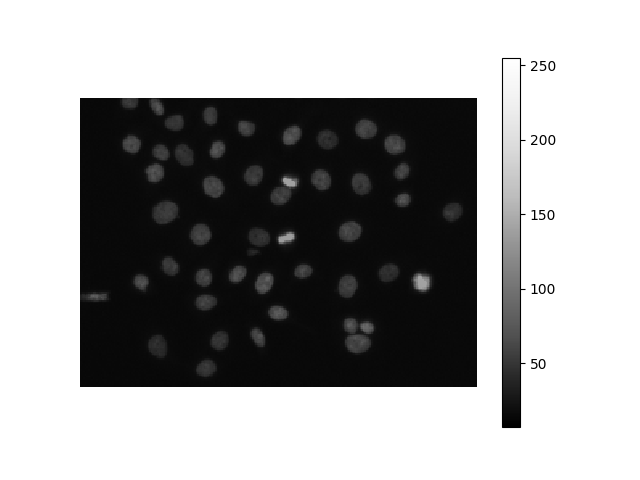
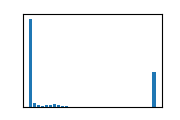

In [3]:
stackview.insight(image)

## Apply Voronoi-Otsu-Labeling

Now, we will apply the Voronoi-Otsu-Labeling to segment the nuclei in the image.

In [4]:
labels = nsbatwm.voronoi_otsu_labeling(image, spot_sigma=3.5, outline_sigma=1)

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_segment_blobs_and_things_with_membranes/__init__.py:564: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (180, 247, 4) looks like that of an RGB image.
  threshold = sk_threshold_otsu(blurred_outline)


## Display Segmentation Results

View the segmented image on top of the original using `stackview`.

In [5]:
stackview.animate_curtain(image, labels)

IndexError: index 192 is out of bounds for axis 0 with size 180

## Save the Segmented Image

Finally, we save the resulting labeled image as a PNG file.

In [ ]:
imsave('segmented_labels.png', labels.astype(np.uint8))